In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from statistics import mean, median
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

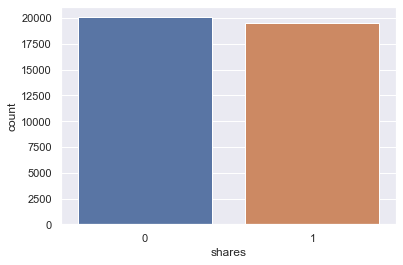

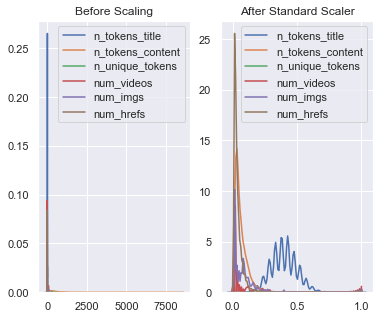

The Threshold Value to judge is :  0.005
The Model Score is :  0.6506575185820469
Receiver operating characteristic score is :  0.650324920414845


In [2]:
sns.set()

filename = 'finalized_model_binclass.sav'

dataset = "OnlineNewsPopularityClassification.csv"
#better choice than np.loadtxt
df = pd.read_csv(dataset)
plt.show()
sns.countplot(x='shares', data=df)
plt.show()


#first 2 columns are meta data, not used for training
df = df.iloc[:, 2:]
scaler = MinMaxScaler()

X=df.drop('shares', axis=1)
X[X.columns] = scaler.fit_transform(X[X.columns])
y=df['shares']


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['n_tokens_title'], ax=ax1)
sns.kdeplot(df['n_tokens_content'], ax=ax1)
sns.kdeplot(df['n_unique_tokens'], ax=ax1)
sns.kdeplot(df['num_videos'], ax=ax1)
sns.kdeplot(df['num_imgs'], ax=ax1)
sns.kdeplot(df['num_hrefs'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(X['n_tokens_title'], ax=ax2)
sns.kdeplot(X['n_tokens_content'], ax=ax2)
sns.kdeplot(X['n_unique_tokens'], ax=ax2)
sns.kdeplot(X['num_videos'], ax=ax2)
sns.kdeplot(X['num_imgs'], ax=ax2)
sns.kdeplot(X['num_hrefs'], ax=ax2)
plt.show()

svd = TruncatedSVD(n_components=10)
arr = svd.fit_transform(X)
arr = pd.DataFrame(arr)
new_X = pd.concat([X, arr], axis=1)
new_X[new_X.columns] = scaler.fit_transform(new_X[new_X.columns])

train_X, test_X, train_y, test_y = train_test_split(new_X, y, train_size=0.25, random_state=123)


#Dimensionality reduction

#ca= decomposition.TruncatedSVD(n_components=40)
#a = decomposition.FactorAnalysis()
#rain_X = pca.fit_transform(train_X)
#est_X = pca.fit_transform(test_X)


#print(mean(y)) #3395
#print(median(y)) #1400



#model = svm.SVC() #too slow (quadratic in terms of n_samples) and poor accuracy
#model = neighbors.KNeighborsClassifier(n_neighbors=11)
#model = naive_bayes.GaussianNB()
#model = tree.DecisionTreeClassifier(criterion="gini")

log_reg = linear_model.LogisticRegression() #good

lda = discriminant_analysis.LinearDiscriminantAnalysis() #better

rf = RandomForestClassifier(n_estimators=50, criterion="entropy") #best

#model = VotingClassifier(estimators=[ ('lr', log_reg), ('lda', lda), ('rf', rf)], voting='soft', weights=[1,1.5,2.25])


model = RandomForestClassifier(n_estimators=50, criterion="entropy", n_jobs=-1, random_state=123) #best - 67.33

model.fit(train_X, train_y)
#print(len(model.feature_importances_))
threshold = 1/len(model.feature_importances_)
threshold = 0.005
print("The Threshold Value to judge is : ",threshold)

#model.fit(train_X, train_y)
#print(model.score(test_X, test_y))


#cross_val

#model.fit(train_X, train_y)
print("The Model Score is : ",model.score(test_X, test_y))
y_pred = model.predict(test_X)
print("Receiver operating characteristic score is : ",roc_auc_score(test_y, y_pred))

#scores = cross_val_score(model, new_X, y, cv=10)
#print(scores)
#print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #
#print(len(model.feature_importances_))


In [ ]:
"""
#dropping less important columns
keys = new_X.keys()
count = 0
for i in range(len(model.feature_importances_)):
    val = model.feature_importances_[i]
    if val > threshold:
        count+=1
        try:
            print(keys[i])
        except:
            print("Error")
        print(str(val))
        #df = df.drop(keys[i], axis=1)

print(count)
"""